In [1]:
import nltk
from datasets import load_from_disk
from transformers import AutoTokenizer
from collections import Counter
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
import utils

### Dataset Loading

In [2]:
sw_dataset_name = "SimpleWikipedia_tokenized_and_measured"
ose_dataset_name = "OneStopEnglish_tokenized_and_measured"

sw_dataset_path = f"./results/hf_datasets/{sw_dataset_name}"
ose_dataset_path = f"./results/hf_datasets/{ose_dataset_name}"

sw_dataset = load_from_disk(f"./results/hf_datasets/{sw_dataset_name}")
ose_dataset = load_from_disk(f"./results/hf_datasets/{ose_dataset_name}")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

### Inspection of samples with specific metric value

In [3]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
num_printed_samples = 0
for example in tqdm(sw_dataset):
    if num_printed_samples == 10:
        break
    if example["ttr_words"] == 1:
        word_list = nltk.word_tokenize(example["text"])
        print(f"Sample {num_printed_samples+1}: ", example["text"])
        print("word tokens (nltk): ", word_list)
        print("tokens (bert): ", tokenizer.convert_ids_to_tokens(example["input_ids"]))
        print("----------------------------------------------------------------------------------------")
        num_printed_samples += 1

------------- Simple Wikipedia -----------------------------------------------------------


  0%|          | 12/371594 [00:00<06:11, 1000.07it/s]

Sample 1:  It is the county seat of Alfalfa County .
word tokens (nltk):  ['It', 'is', 'the', 'county', 'seat', 'of', 'Alfalfa', 'County', '.']
tokens (bert):  ['[CLS]', 'it', 'is', 'the', 'county', 'seat', 'of', 'alfa', '##lf', '##a', 'county', '.', '[SEP]']
----------------------------------------------------------------------------------------
Sample 2:  Cherokee is a city of Oklahoma in the United States .
word tokens (nltk):  ['Cherokee', 'is', 'a', 'city', 'of', 'Oklahoma', 'in', 'the', 'United', 'States', '.']
tokens (bert):  ['[CLS]', 'cherokee', 'is', 'a', 'city', 'of', 'oklahoma', 'in', 'the', 'united', 'states', '.', '[SEP]']
----------------------------------------------------------------------------------------
Sample 3:  Skateboard decks are normally between 28 and 33 inches long .
word tokens (nltk):  ['Skateboard', 'decks', 'are', 'normally', 'between', '28', 'and', '33', 'inches', 'long', '.']
tokens (bert):  ['[CLS]', 'skate', '##board', 'decks', 'are', 'normally', 'b

In [4]:
print("------------- OneStopEnglish -----------------------------------------------------------")
num_printed_samples = 0
for example in tqdm(ose_dataset):
    if num_printed_samples == 10:
        break
    if example["ttr_words"] == 1:
        word_list = nltk.word_tokenize(example["text"])
        print(f"Sample {num_printed_samples+1}: ", example["text"])
        print("word tokens (nltk): ", word_list)
        print("tokens (bert): ", tokenizer.convert_ids_to_tokens(example["input_ids"]))
        print("----------------------------------------------------------------------------------------")
        num_printed_samples += 1

------------- OneStopEnglish -----------------------------------------------------------


  0%|          | 18/18704 [00:00<00:03, 6003.30it/s]

Sample 1:  ﻿An octopus has escaped from the National Aquarium in New Zealand.
word tokens (nltk):  ['\ufeffAn', 'octopus', 'has', 'escaped', 'from', 'the', 'National', 'Aquarium', 'in', 'New', 'Zealand', '.']
tokens (bert):  ['[CLS]', 'an', 'octopus', 'has', 'escaped', 'from', 'the', 'national', 'aquarium', 'in', 'new', 'zealand', '.', '[SEP]']
----------------------------------------------------------------------------------------
Sample 2:  It escaped from its tank, slid down a 50-metre drainpipe and disappeared into the sea.
word tokens (nltk):  ['It', 'escaped', 'from', 'its', 'tank', ',', 'slid', 'down', 'a', '50-metre', 'drainpipe', 'and', 'disappeared', 'into', 'the', 'sea', '.']
tokens (bert):  ['[CLS]', 'it', 'escaped', 'from', 'its', 'tank', ',', 'slid', 'down', 'a', '50', '-', 'metre', 'drain', '##pipe', 'and', 'disappeared', 'into', 'the', 'sea', '.', '[SEP]']
----------------------------------------------------------------------------------------
Sample 3:  Inky – a common

Note: The same word lower and uppercase are being considered different words.

In [5]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
num_printed_samples = 0
for example in tqdm(sw_dataset):
    if num_printed_samples == 10:
        break
    if example["sentence_length_words"] > 50:
        word_list = nltk.word_tokenize(example["text"])
        print(f"Sample {num_printed_samples+1}: ", example["text"])
        # print("word tokens (nltk): ", word_list)
        # print("tokens (bert): ", tokenizer.convert_ids_to_tokens(example["input_ids"]))
        print("----------------------------------------------------------------------------------------")
        num_printed_samples += 1

------------- Simple Wikipedia -----------------------------------------------------------


  0%|          | 1735/371594 [00:00<00:31, 11721.84it/s]

Sample 1:  The Chenab River -LRB- Punjabi : à à à 3\/4 à , IAST : canÄ b , Urdu : Ú Ù Ø Ø , literally : ` Moon -LRB- Chan -RRB- Ú Ù River -LRB- aab -RRB- ' -RRB- Ø cents Ø is formed by the confluence of the Chandra and Bhaga rivers at Tandi located in the upper Himalayas in the Lahul and Spiti District of Himachal Pradesh , Republic of India .
----------------------------------------------------------------------------------------
Sample 2:  At the beginning this temple was dedicated to Jupiter alone , it was built in the mid 2nd century BC at the same time as the temple of Apollo was being worked on - this was the era at which Roman influence over Pompeii was at its height and so Roman Jupiter beat out the Greek Apollo as the town 's highest god .
----------------------------------------------------------------------------------------
Sample 3:  Hot Mainstream Rock Tracks -LRB- originally called Mainstream Rock Tracks -RRB- is a ranking in Billboard magazine of the most-played songs o

In [6]:
print("------------- OneStopEnglish -----------------------------------------------------------")
num_printed_samples = 0
for example in tqdm(ose_dataset):
    if num_printed_samples == 10:
        break
    if example["sentence_length_words"] > 50:
        word_list = nltk.word_tokenize(example["text"])
        print(f"Sample {num_printed_samples+1}: ", example["text"])
        # print("word tokens (nltk): ", word_list)
        # print("tokens (bert): ", tokenizer.convert_ids_to_tokens(example["input_ids"]))
        print("----------------------------------------------------------------------------------------")
        num_printed_samples += 1

------------- OneStopEnglish -----------------------------------------------------------


  0%|          | 0/18704 [00:00<?, ?it/s]

Sample 1:  “But we can, and should, do more to increase transparency and build public support for privacy protections.” 
Feinstein said the bill would also make a number of improvements to transparency and checks on the NSA – for example, if the Foreign Intelligence Surveillance Act (FISA) gets some data and then somebody looks at that data without permission, they could spend up to ten years in prison.
----------------------------------------------------------------------------------------


  8%|▊         | 1431/18704 [00:00<00:01, 11135.61it/s]

Sample 2:  “From 28 February 2013, at 20.00 hours”, he told a gathering of cardinals in the Vatican, “the see of Rome, the see of Saint Peter, will be vacant and there will be an election for a new Pope.” 
One of the cardinals at the gathering was a Mexican cardinal, Monsignor Oscar Sanchéz Barba, from Guadalajara.
----------------------------------------------------------------------------------------
Sample 3:  “At the end of the day I was in a private area and there should be a certain amount of privacy that one should expect.” 
When he was asked why he and his brother liked helicopters, he said, “Probably because you can only fit a few people in a helicopter, so no one can follow us, like you guys.”
----------------------------------------------------------------------------------------
Sample 4:  Singer Jarvis Cocker said, “It seems stupid to have something happening in front of you and look at it on a screen that’s smaller than a cigarette packet.” 
Even in the world of classical

### Inspecting extreme values of the metrics

In [7]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
sorted_dataset = sw_dataset.sort("perplexity", reverse=True)  # descending: get high perplexity sentences first
for i in range(30):
    example = sorted_dataset[i]
    print(f"Sample {i+1}: ", example["text"])
    print("sentence_length: ", example["sentence_length_words"])
    # print("word tokens (nltk): ", word_list)
    # print("tokens (bert): ", tokenizer.convert_ids_to_tokens(example["input_ids"]))
    print("----------------------------------------------------------------------------------------")

------------- Simple Wikipedia -----------------------------------------------------------
Sample 1:  Managers
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 2:  managers
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 3:  Napoli
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 4:  players
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 5:  players
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 6:  seasons
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 7:  Bush
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 8:  prod

In [8]:
print("------------- OneStopEnglish -----------------------------------------------------------")
sorted_dataset = sw_dataset.sort("perplexity", reverse=True)  # descending: get high perplexity sentences first
for i in range(30):
    example = sorted_dataset[i]
    print(f"Sample {i+1}: ", example["text"])
    print("sentence_length: ", example["sentence_length_words"])
    # print("word tokens (nltk): ", word_list)
    # print("tokens (bert): ", tokenizer.convert_ids_to_tokens(example["input_ids"]))
    print("----------------------------------------------------------------------------------------")

------------- OneStopEnglish -----------------------------------------------------------
Sample 1:  Managers
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 2:  managers
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 3:  Napoli
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 4:  players
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 5:  players
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 6:  seasons
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 7:  Bush
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 8:  produc

### Plotting different metrics against each other

In [9]:
# Plot full dataset using hexbin histogram
x_label = "sentence_length_words"
y_label = "fre_score_words"

------------- Simple Wikipedia -----------------------------------------------------------


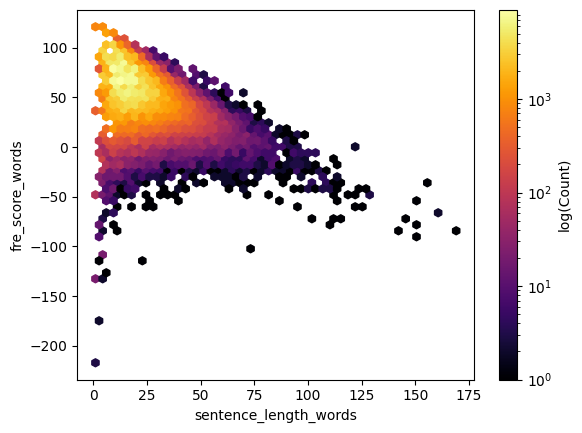

In [10]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
x = sw_dataset[x_label]
y = sw_dataset[y_label]

plt.hexbin(x, y, gridsize=50, cmap='inferno', bins='log')
plt.colorbar(label='log(Count)')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

------------- OneStopEnglish -----------------------------------------------------------


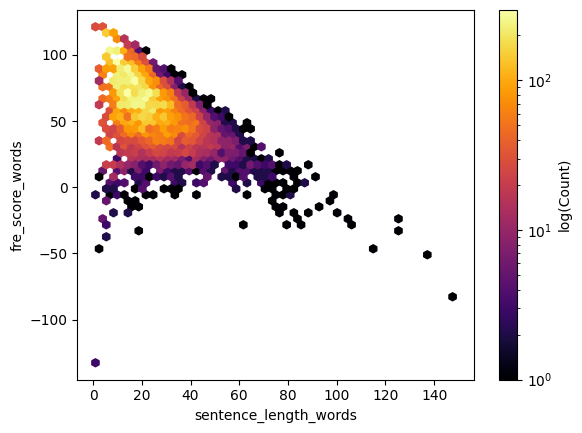

In [11]:
print("------------- OneStopEnglish -----------------------------------------------------------")
x = ose_dataset[x_label]
y = ose_dataset[y_label]

plt.hexbin(x, y, gridsize=50, cmap='inferno', bins='log')
plt.colorbar(label='log(Count)')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [12]:
# # Plot concrete datapoints using stratified sampling
# df = dataset.select_columns([x_label, y_label]).to_pandas()
# df["bin"] = pd.cut(df[x_label], bins=50)

# stratified_sample = df.groupby("bin", observed=True).apply(
#     lambda x: x.sample(n=min(len(x), 50), random_state=42),
#     include_groups=False
# ).reset_index(drop=True)

# plt.scatter(stratified_sample[x_label], stratified_sample[y_label], alpha=0.5)
# plt.title("Stratified Sample")
# plt.show()

### Filter dataset to only contain examples with valid values

In [13]:
selected_metrics = ["sentence_length_words", "word_rarity_words", "fre_score_words", "shannon_entropy_words", "ttr_words", "perplexity"]

# define a filter function that determines if a sample is kept (True) or not (False)
def is_valid(example):
    for m in selected_metrics:
        if math.isnan(float(example[m])):
            return False
    return True

sw_clean_dataset = sw_dataset.filter(is_valid)
ose_clean_dataset = ose_dataset.filter(is_valid)

print(f"Original size (SimpleWikipedia): {len(sw_dataset)}")
print(f"Clean size (SimpleWikipedia): {len(sw_clean_dataset)}")

print(f"Original size (OneStopEnglish): {len(ose_dataset)}")
print(f"Clean size (OneStopEnglish): {len(ose_clean_dataset)}")

utils.update_existing_dataset(sw_clean_dataset, f"./results/hf_datasets/{sw_dataset_name}")
utils.update_existing_dataset(ose_clean_dataset, f"./results/hf_datasets/{ose_dataset_name}")

Filter:   0%|          | 0/371594 [00:00<?, ? examples/s]

Filter:   0%|          | 0/18704 [00:00<?, ? examples/s]

Original size (SimpleWikipedia): 371594
Clean size (SimpleWikipedia): 371594
Original size (OneStopEnglish): 18704
Clean size (OneStopEnglish): 18704


Saving the dataset (0/1 shards):   0%|          | 0/371594 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/18704 [00:00<?, ? examples/s]

### Difficulty Classifier Evaluation

Overall Accuracy: 0.5310


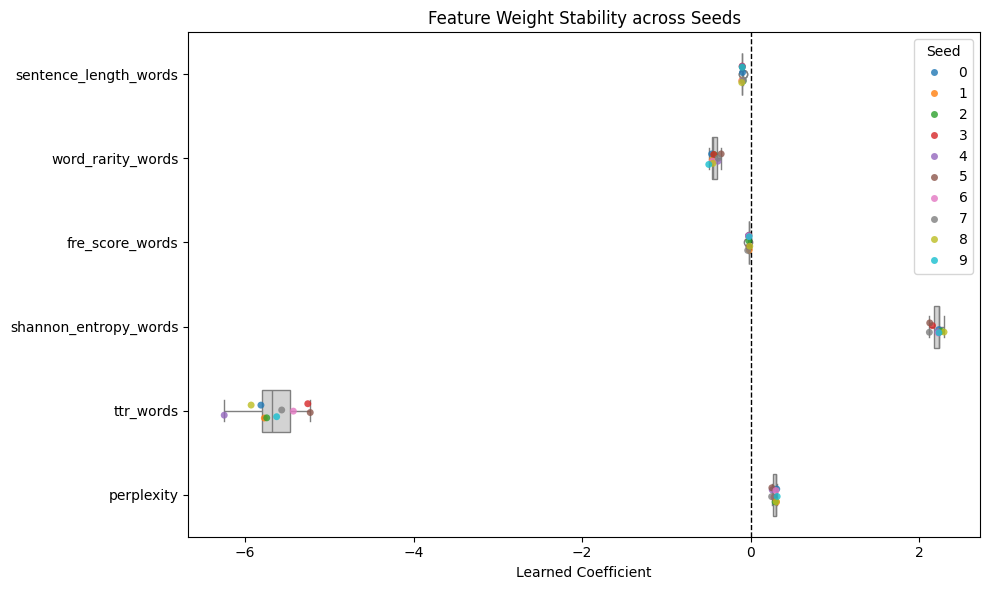

In [14]:
EXPERIMENT_DIR = f"./results/difficulty_classifier/"
# Load the data
with open(f"{EXPERIMENT_DIR}/log.json", 'r') as f:
    data = json.load(f)

print(f"Overall Accuracy: {data['aggregates']['mean_accuracy']:.4f}")

feature_names = data["config"]["selected_metrics"]

# convert to long format df for plotting
records = []
for run in data['runs']:
    seed = run['seed']
    weights = run['weights']
    
    for name, weight in zip(feature_names, weights):
        records.append({
            "Seed": str(seed),
            "Feature": name,
            "Weight": weight
        })

df = pd.DataFrame(records)


plt.figure(figsize=(10, 6))
# boxplot
sns.boxplot(
    data=df, 
    x="Weight", 
    y="Feature", 
    color="lightgray",
    showfliers=True,
    width=0.5
)

# overlap strip plot
sns.stripplot(
    data=df, 
    x="Weight", 
    y="Feature", 
    hue="Seed",
    # color="red", 
    size=5, 
    jitter=0.1, 
    alpha=0.8
)


plt.axvline(0, color='black', linestyle='--', linewidth=1) # The "Zero" line
plt.title("Feature Weight Stability across Seeds")
plt.xlabel("Learned Coefficient")
plt.ylabel("")
plt.tight_layout()

plt.show()

In [15]:
EXPERIMENT_DIR = f"./results/difficulty_classifier/"
# Load the data
with open(f"{EXPERIMENT_DIR}/log.json", 'r') as f:
    data = json.load(f)

print(f"Overall Accuracy: {data['aggregates']['mean_accuracy']:.3f} +/- {data['aggregates']['std_accuracy']:.3f}")
print(f"Overall F1: {data['aggregates']['mean_f1']:.3f} +/- {data['aggregates']['std_f1']:.3f}")
conv_epoch_list = [run["num_epochs"] for run in data["runs"]]
print(f"Overall num_epochs: {np.mean(conv_epoch_list):.3f} +/- {np.std(conv_epoch_list):.3f}")

Overall Accuracy: 0.531 +/- 0.006
Overall F1: 0.512 +/- 0.051
Overall num_epochs: 6.200 +/- 1.720


### Add classifier score to datasets (skip if already computed)

In [16]:
from composite_difficulty_metric import LogisticRegression
import torch
print("Adding new column to dataset ...")
# model loading
EXPERIMENT_DIR = f"./results/difficulty_classifier/"
# # Load the data
with open(f"{EXPERIMENT_DIR}/log.json", 'r') as f:
    data = json.load(f)
selected_metrics = data["config"]["selected_metrics"]
# model is small enough that cpu suffices
device = "cpu"
target_seed = 2
model_path = f"{EXPERIMENT_DIR}/model_seed_{target_seed}.pt"
model = LogisticRegression(len(selected_metrics)).to(device)
state_dict = torch.load(model_path)
model.load_state_dict(state_dict)
model.eval()

# set up method to compute difficulty classifier metric
def compute_classifier_score(example, model):
    input_metrics = [float(example[m]) for m in selected_metrics]
    input_tensor = torch.tensor(input_metrics).unsqueeze(0).to(torch.float32).to(device)
    with torch.no_grad():
        logit = model(input_tensor).item()
    return {"classifier_score": logit}

sw_dataset_path = "./results/hf_datasets/SimpleWikipedia_tokenized_and_measured"
sw_dataset = load_from_disk(sw_dataset_path)
sw_dataset = sw_dataset.map(compute_classifier_score, batched=False, fn_kwargs={"model": model})
utils.update_existing_dataset(sw_dataset, sw_dataset_path)


ose_dataset_path = "./results/hf_datasets/OneStopEnglish_tokenized_and_measured"
ose_dataset = load_from_disk(ose_dataset_path)
ose_dataset = ose_dataset.map(compute_classifier_score, batched=False, fn_kwargs={"model": model})
utils.update_existing_dataset(ose_dataset, ose_dataset_path)

print("Adding new column to dataset done")

Adding new column to dataset ...


Map:   0%|          | 0/371594 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/371594 [00:00<?, ? examples/s]

Map:   0%|          | 0/18704 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/18704 [00:00<?, ? examples/s]

Adding new column to dataset done


### Plotting Histograms

------------- Simple Wikipedia -----------------------------------------------------------
Computing histograms ...


100%|██████████| 371594/371594 [00:35<00:00, 10355.72it/s]


Computing histograms done
Saving results to disk ...
Saving results to disk done


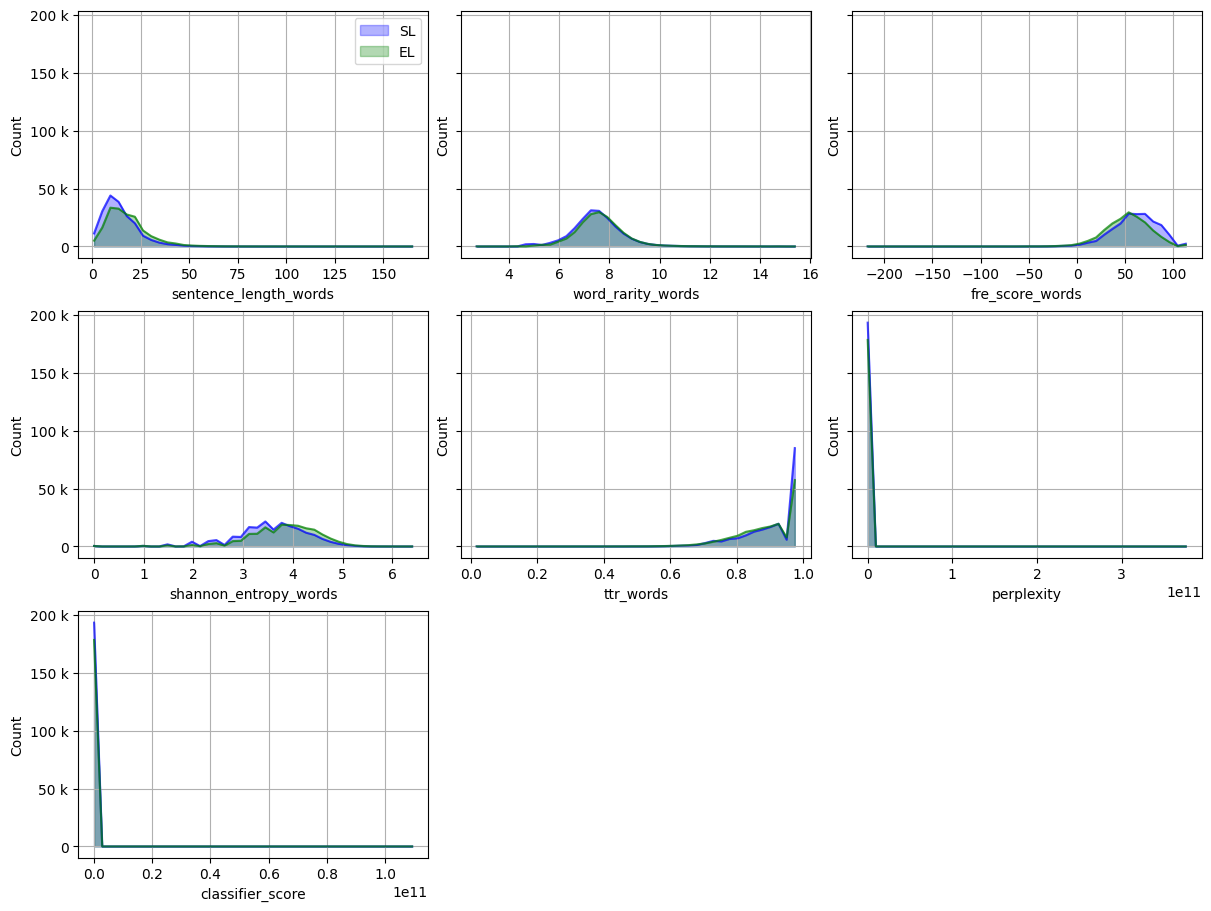

In [17]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
selected_metrics = ["sentence_length_words", "word_rarity_words", "fre_score_words", "shannon_entropy_words", "ttr_words", "perplexity", "classifier_score"]
eval_dict = utils.compute_histograms(sw_dataset_name, save_to_disk=True)  # comment out of histograms are already computed and saved to disk
utils.plot_metrics_hist(sw_dataset_name, selected_metrics)

------------- OneStopEnglish -----------------------------------------------------------
Computing histograms ...


100%|██████████| 18704/18704 [00:01<00:00, 11208.42it/s]


Computing histograms done
Saving results to disk ...
Saving results to disk done


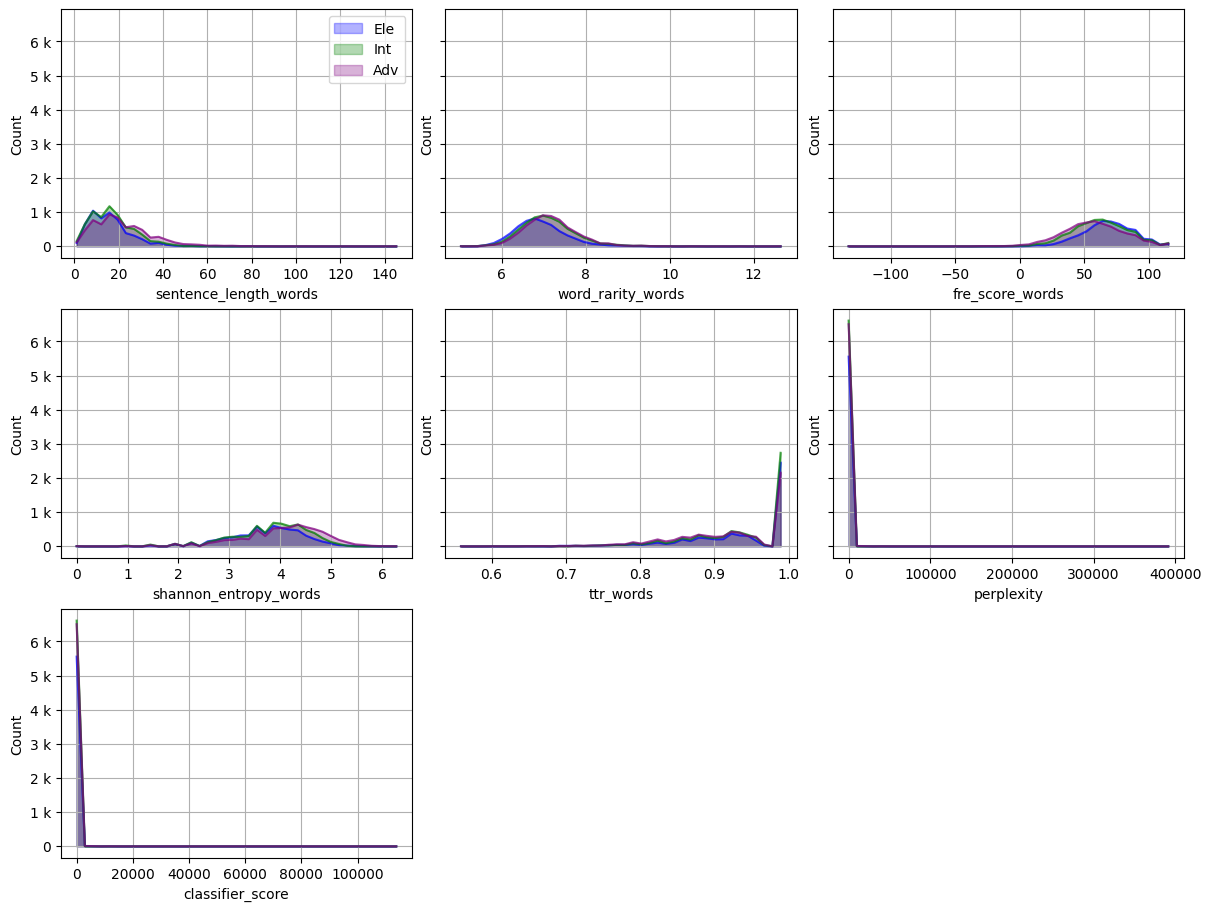

In [18]:
print("------------- OneStopEnglish -----------------------------------------------------------")
selected_metrics = ["sentence_length_words", "word_rarity_words", "fre_score_words", "shannon_entropy_words", "ttr_words", "perplexity", "classifier_score"]
eval_dict = utils.compute_histograms(ose_dataset_name, save_to_disk=True)  # comment out of histograms are already computed and saved to disk
utils.plot_metrics_hist(ose_dataset_name, selected_metrics)

### Filter outliers

In [19]:
metrics_to_filter = ["sentence_length_words", "word_rarity_words", "fre_score_words", "shannon_entropy_words", "ttr_words", "perplexity", "classifier_score"]
ose_dataset = load_from_disk(ose_dataset_path)
sw_dataset = load_from_disk(sw_dataset_path)

# compute filtering bounds for each metric
def compute_bounds(dataset, metrics_to_filter):
    bounds = {}
    for m in metrics_to_filter:
        col = dataset[m]
        q1, q3 = np.percentile(col, [25, 75])
        iqr = q3 - q1
        bounds[m] = {
            "min": q1 - 1.5 * iqr,
            "max": q3 + 1.5 * iqr
        }
    return bounds

bounds_sw = compute_bounds(sw_dataset, metrics_to_filter)
bounds_ose = compute_bounds(ose_dataset, metrics_to_filter)

# define a filter function that determines if a sample is kept (True) or not (False)
# def filter_dataset(example, bounds):
#     for m in metrics_to_filter:
#         if not (bounds[m]["min"] <= example[m] <= bounds[m]["max"]):
#             return False
        
#     return True


# sw_filtered_dataset = sw_dataset.filter(filter_dataset, fn_kwargs={"bounds":bounds_sw})

# ose_filtered_dataset = ose_dataset.filter(filter_dataset, fn_kwargs={"bounds":bounds_ose})

# print("SimpleWikipedia")
# print(f"Original size: {len(sw_dataset)}")
# print(f"Clean size: {len(sw_filtered_dataset)}")

# print("OneStopEnglish")
# print(f"Original size: {len(ose_dataset)}")
# print(f"Clean size: {len(ose_filtered_dataset)}")

# sw_filtered_dataset.save_to_disk(f"./results/hf_datasets/SimpleWikipedia_filtered")
# ose_filtered_dataset.save_to_disk(f"./results/hf_datasets/OneStopEnglish_filtered")

------------- Simple Wikipedia -----------------------------------------------------------
Computing histograms ...


100%|██████████| 371594/371594 [00:34<00:00, 10692.58it/s]


Computing histograms done
Saving results to disk ...
Saving results to disk done


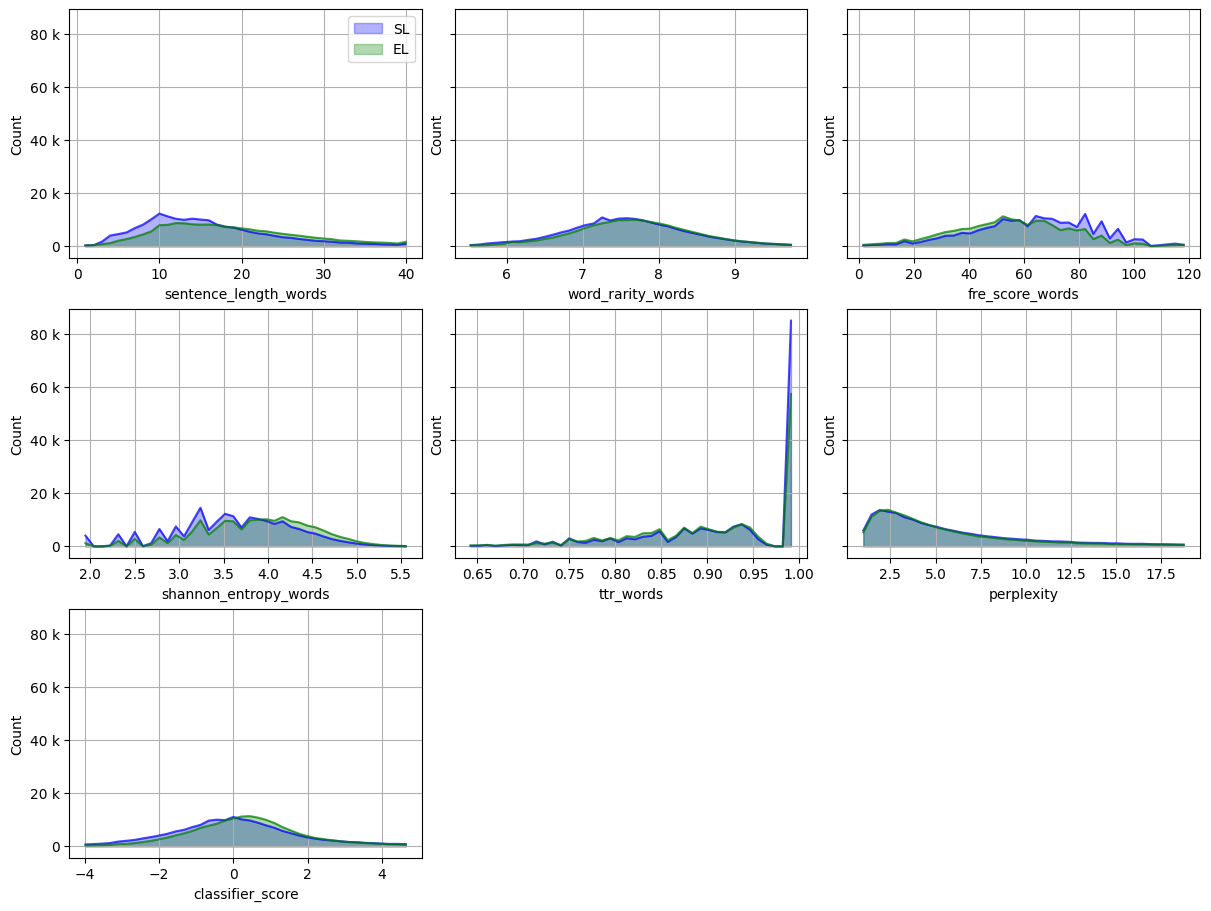

In [20]:
sw_dataset_name = "SimpleWikipedia_tokenized_and_measured"
ose_dataset_name = "OneStopEnglish_tokenized_and_measured"
print("------------- Simple Wikipedia -----------------------------------------------------------")
selected_metrics = ["sentence_length_words", "word_rarity_words", "fre_score_words", "shannon_entropy_words", "ttr_words", "perplexity", "classifier_score"]
eval_dict = utils.compute_histograms(sw_dataset_name, save_to_disk=True, bounds=bounds_sw)  # comment out of histograms are already computed and saved to disk
utils.plot_metrics_hist(sw_dataset_name, selected_metrics, filtered=True)

------------- OneStopEnglish -----------------------------------------------------------
Computing histograms ...


100%|██████████| 18704/18704 [00:01<00:00, 10974.53it/s]


Computing histograms done
Saving results to disk ...
Saving results to disk done


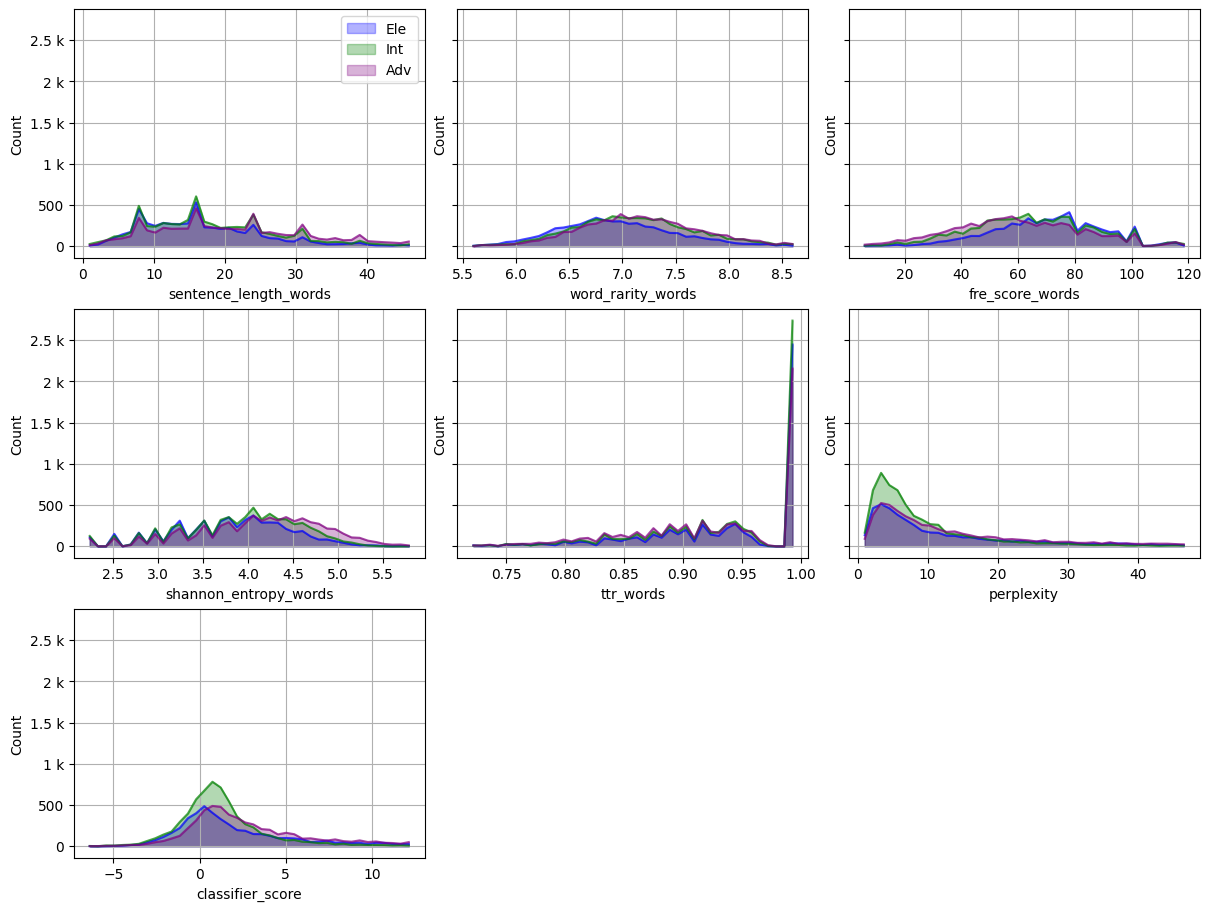

In [21]:
print("------------- OneStopEnglish -----------------------------------------------------------")
selected_metrics = ["sentence_length_words", "word_rarity_words", "fre_score_words", "shannon_entropy_words", "ttr_words", "perplexity", "classifier_score"]
eval_dict = utils.compute_histograms(ose_dataset_name, save_to_disk=True, bounds=bounds_ose)  # comment out of histograms are already computed and saved to disk
utils.plot_metrics_hist(ose_dataset_name, selected_metrics, filtered=True)

### Figures for presentations/reports

------------- Simple Wikipedia -----------------------------------------------------------


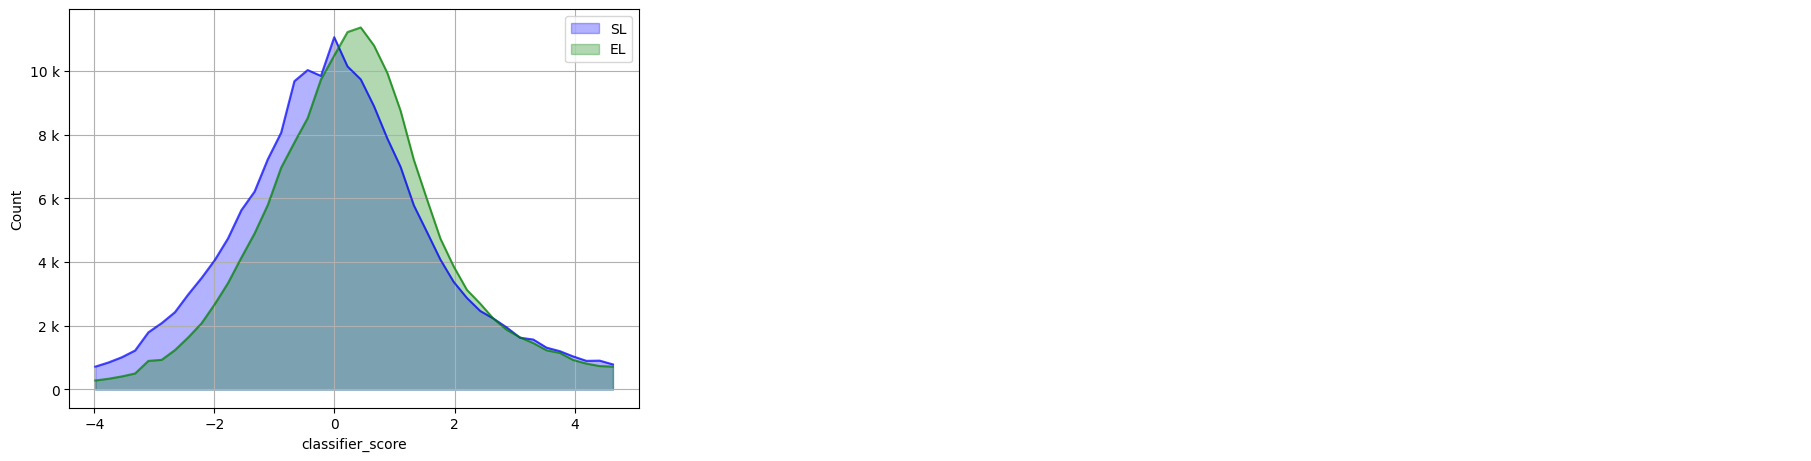

In [24]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
sw_filtered_dataset_name = "SimpleWikipedia_tokenized_and_measured"
selected_metrics = ["classifier_score"]
# eval_dict = utils.compute_histograms(sw_filtered_dataset_name, save_to_disk=True)  # comment out of histograms are already computed and saved to disk
utils.plot_metrics_hist(sw_filtered_dataset_name, selected_metrics, filtered=True, base_size=(1.5*4, 1.5*3))

------------- OneStopEnglish -----------------------------------------------------------


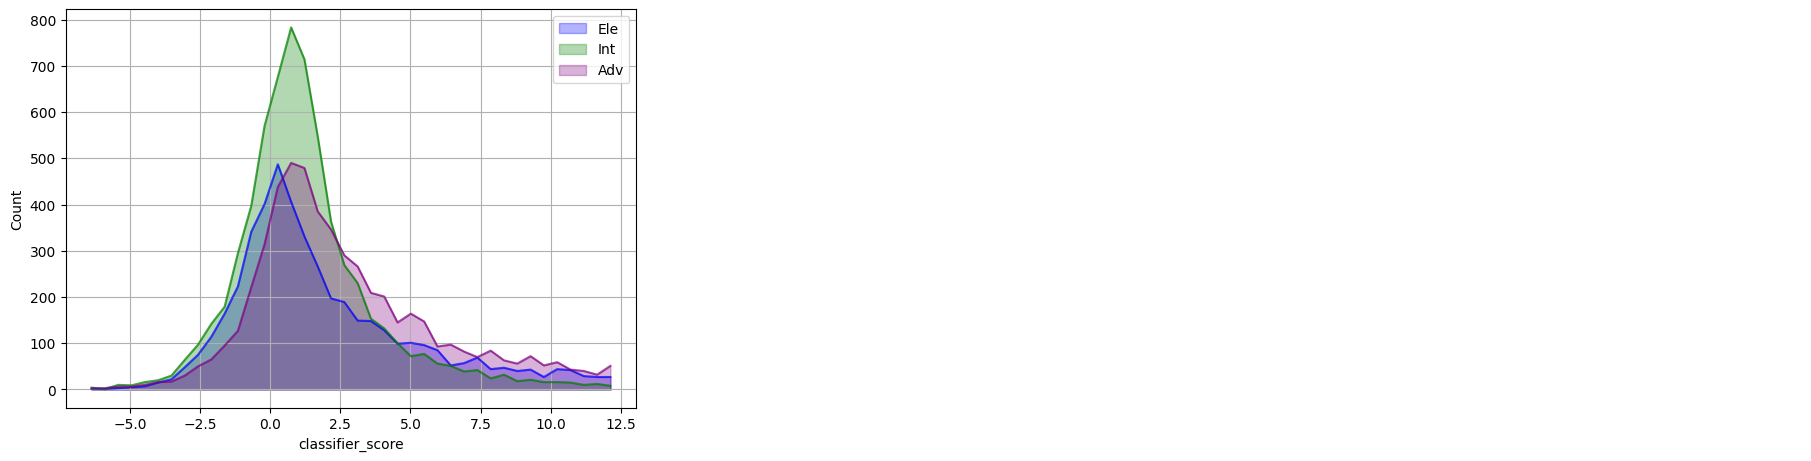

In [25]:
print("------------- OneStopEnglish -----------------------------------------------------------")
ose_filtered_dataset_name = "OneStopEnglish_tokenized_and_measured"
selected_metrics = ["classifier_score"]
# eval_dict = utils.compute_histograms(ose_filtered_dataset_name, save_to_disk=True)  # comment out of histograms are already computed and saved to disk
utils.plot_metrics_hist(ose_filtered_dataset_name, selected_metrics, filtered=True, base_size=(1.5*4, 1.5*3))

### Add uncased TTR column

In [26]:
### Add ttr_case_insensitive column
# set up method to compute difficulty classifier metric
def compute_ttr_case_insensitive(example):
    word_list = nltk.word_tokenize(example["text"])
    word_list = [w.lower() for w in word_list if w.isalpha()]  # comment out if words with non alphabetic letters are also of interest
    return {"ttr_uncased_words": len(np.unique(word_list))/len(word_list)}

sw_dataset_path = "./results/hf_datasets/SimpleWikipedia_tokenized_and_measured"
sw_dataset = load_from_disk(sw_dataset_path)
sw_dataset = sw_dataset.map(compute_ttr_case_insensitive, batched=False)
utils.update_existing_dataset(sw_dataset, sw_dataset_path)


ose_dataset_path = "./results/hf_datasets/OneStopEnglish_tokenized_and_measured"
ose_dataset = load_from_disk(ose_dataset_path)
ose_dataset = ose_dataset.map(compute_ttr_case_insensitive, batched=False)
utils.update_existing_dataset(ose_dataset, ose_dataset_path)

print("Adding new column to dataset done")

Map:   0%|          | 0/371594 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/371594 [00:00<?, ? examples/s]

Map:   0%|          | 0/18704 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/18704 [00:00<?, ? examples/s]

Adding new column to dataset done
